# HOUSE PRICE PREDICTION MACHINE LEARNING MODEL

## INTRODUCTION

This notebook will be going through some basic steps of feature selection to build a Multiple Linear Regression model and a K-nearest Neighbors (KNN) Regressor model for house price prediction, evaluating and enhancing models' performance by feature scaling techniques.

## 1. PROBLEM DEFINITION

With the given parameters, how well we can predict the price of a house using a machine learning model?

## 2. DATA PREPARATION

### a. Data description

* Data source: House Sales in King County, USA [Link](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction).
* Data organization: 1 CSV file organized in a long data format.
* Sample size: 21,613 observations.
* Number of features: 21 columns.
* Data duration: 2014-05-01 to 2015-05-01.
* Data credibility: Since the data was collected by a third party, it is difficult to verify the reliability of the dataset.
* Data license: CC0 Public Domain.

### b. Features

Kaggle also provides a [data dictionary](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction) detailing all of the features of the dataset.
* id - Unique ID for each home sold.
* date - Date of the home sale.
* price - Price of each home sold.
* bedrooms - Number of bedrooms.
* bathrooms - Number of bathrooms, where 0.5 accounts for a room with a toilet but no shower.
* sqft_living - Square footage of the apartments interior living space.
* sqft_lot - Square footage of the land space.
* floors - Number of floors.
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not.
* view - An index from 0 to 4 of how good the view of the property was, higher number better view.
* condition - An index from 1 to 5 on the condition of the apartment, higher number better condition.
* grade - An index from 1 to 13, higher number higher quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level.
* sqft_basement - The square footage of the interior housing space that is below ground level.
* yr_built - The year the house was initially built.
* yr_renovated - The year of the house’s last renovation.
* zipcode - What zipcode area the house is in.
* lat - Lattitude.
* long - Longitude.
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors.
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors.


## 3. DATA PROCESSING

I decide to use Python for data cleaning and data modeling because we can use Scikit-learn, which is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.

Let's load some required packages for data modeling and import our dataset.

In [1]:
#Regular EDA (exploratory data analysis) and plotting libraries
import math
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pyplot as plt


#Package for splitting the dataset to training set and test set
from sklearn.model_selection import train_test_split, cross_val_predict

#Package for Linear Regression model
from sklearn.linear_model import LinearRegression

#Packages to perform Exhaustive Search
from dmba import regressionSummary, exhaustive_search
from dmba import adjusted_r2_score, AIC_score, BIC_score

#Package for KNN Regressor model
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor

#Package for data standardization
from sklearn.preprocessing import StandardScaler

#Package for model evaluation
from dmba import regressionSummary, classificationSummary
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
#Importing housing dataset
housing_df = pd.read_csv('HousingDataSet.csv')

In [3]:
#Viewing the first 10 rows
housing_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
#Viewing dataframe structure
housing_df.shape

(21613, 21)

There are 21,613 rows of 21 fields in our housing dataset.

In [5]:
#Counting the number of values in each column
housing_df.count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

Column names are consistent, there is no missing value in our dataset.

In [6]:
#Counting the number of unique value in each column
housing_df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [7]:
#Rechecking if there are any null values in our dataset
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Text(0.5, 1.0, 'Empty Data')

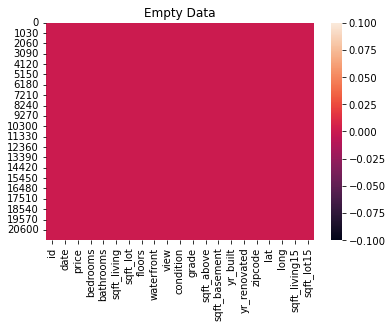

In [8]:
#Plotting null values in our dataset by using heatmap
sns.heatmap(housing_df.isnull())
plt.title("Empty Data")

In [9]:
#Because yr_built is a ordinal variable, I will transform it to a numeric variable.
#Creating AGE variable (age of the property)
housing_df['age'] = 2022 - housing_df['yr_built']

In [10]:
#Changing yr_renovated variable to dummy variable (whether the apartment was renovated or not)
housing_df.loc[housing_df['yr_renovated'] != 0, 'yr_renovated'] = 1

In [11]:
#Renaming column yr_renovated to renovated
housing_df.rename(columns={'yr_renovated': 'renovated'}, inplace=True)

In [12]:
#Droping unnecessary columns id, date, yr_built, zipcode in housing dataset
housing_df.drop(['id', 'date', 'yr_built', 'zipcode'], axis=1, inplace=True)

In [13]:
#Viewing dataframe structure
housing_df.shape

(21613, 18)

After performing data cleaning, we have 21613 observations of 18 variables in total.

## 4. DATA MODELING

### a. Data partitioning

In [14]:
#Creating X and y data matrices (X = predictor variables, y = outcome variable)
X=housing_df.drop(labels=['price'], axis=1)
y=housing_df['price']

In [15]:
#Splitting the dataset into training set size = 0.8 and validation set size = 0.2
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
train_X.shape, train_y.shape, valid_X.shape, valid_y.shape

((17290, 17), (17290,), (4323, 17), (4323,))

To avoid overfitting, we will be running all the functions and training only on the training set (not train again on the test dataset), and then what features we take away from the train dataset, we are going do the same on the validation set.

### b. Feature selection

In this section, I will be using two dimensional reduction techniques: Feature Correlation and Exhaustive Search

#### Feature Correlation

Below are some notes about feature correlation:
* If some independent features (predictors) are highly correlated (with correlation value more than 0.8) we can actually consider removing these features, because these highly correlated features can behave like duplicating themselves.
* If an independent feature (predictor) is highly correlated with a dependent feature (outcome), we should not remove this feature, because it can probably play an important role in our machine learning model.

<AxesSubplot:>

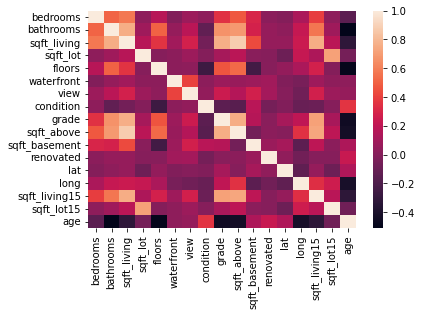

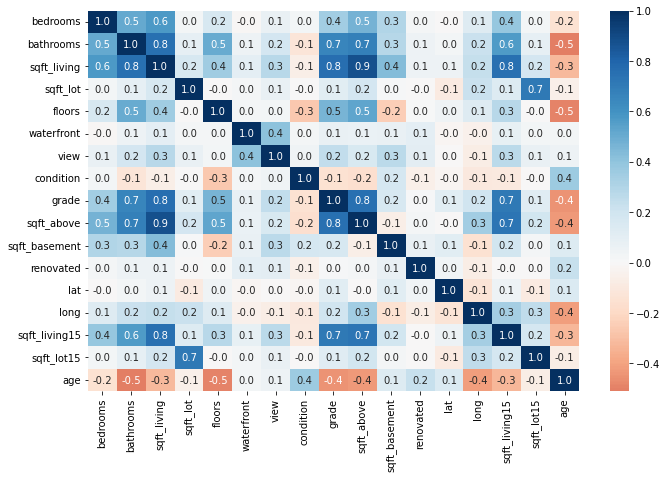

In [17]:
#Constructing a heatmap of correlation on the training set (for only independent variables)
corr = train_X.corr()
sns.heatmap(corr)
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

In [18]:
#Building a correlation function and using it to eliminate predictors on train_X and valid_X
#With the following function we can select highly correlated features
#The function will remove the first feature that is correlated with other features

def correlation(dataset, threshold): # correlation=function name, dataset=train_X, threshold=cutoff value)
    col_corr = set()  # set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)): # i goes through all the values in the correlation matrix columns
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we use each absolute coeff value to compare with threshold value
                colname = corr_matrix.columns[i]  # get the name of column
                col_corr.add(colname) # add the column name to the col_corr set created
    return col_corr

In [19]:
#Counting the number of highly correlated features (with threshold = 0.8)
corr_features = correlation(train_X, 0.8)
len(set(corr_features))

1

In [20]:
#Printing the name of the highly correlated feature
corr_features

{'sqft_above'}

In [21]:
#Removing the highly correlated feature (sqft_above) out of training set
train_X.drop(corr_features,axis=1, inplace= True)

In [22]:
#Removing the highly correlated feature (sqft_above) out of test dataset
valid_X.drop(corr_features,axis=1, inplace= True)

In [23]:
train_X.shape, valid_X.shape

((17290, 16), (4323, 16))

After assessing correlation between features, the train_X and valid_X have 16 columns. 

#### Demo Linear Regression model

In [24]:
#Building a demo regression model
model1 = LinearRegression().fit(train_X, train_y)

In [25]:
#Printing model's coefficients model1
print('Intercept:', model1.intercept_)
print(pd.DataFrame({'Predictor': train_X.columns, 'Coefficients': model1.coef_}))

Intercept: -41905194.967197604
        Predictor   Coefficients
0        bedrooms  -30505.959214
1       bathrooms   37263.673045
2     sqft_living     173.479555
3        sqft_lot       0.134256
4          floors    4571.510669
5      waterfront  544785.250545
6            view   48586.085181
7       condition   31965.342309
8           grade   96625.463722
9   sqft_basement     -32.580110
10      renovated   45385.662485
11            lat  570766.707613
12           long -113957.323648
13  sqft_living15      26.597338
14     sqft_lot15      -0.361636
15            age    2362.443780


In [26]:
#Printing model performance measurement (on training data) model1
regressionSummary(train_y, model1.predict(train_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 194020.6877
            Mean Absolute Error (MAE) : 123541.5638
          Mean Percentage Error (MPE) : -4.2883
Mean Absolute Percentage Error (MAPE) : 25.0341


In [27]:
#Using predict() function to make predictions on test set model1
y_pred1 = model1.predict(valid_X)

In [28]:
#Printing model performance measurement (on test data) model1
regressionSummary(valid_y, y_pred1)


Regression statistics

                      Mean Error (ME) : 6642.5928
       Root Mean Squared Error (RMSE) : 234628.6661
            Mean Absolute Error (MAE) : 130015.4677
          Mean Percentage Error (MPE) : -3.8607
Mean Absolute Percentage Error (MAPE) : 25.3270


In [29]:
#Printing predictive accuracy measurement model1
#Coefficient of determination measures how well the regession model predicts the outcome variable
print('Coefficient of determination (R^2): %.2f'
      % r2_score(valid_y, y_pred1))

Coefficient of determination (R^2): 0.68


#### Exhaustive Search

Even though our demo model performs well with R^2 of 0.68, it is not practical to use this demo model (16 predictors) for prediction. The more predictor features we put into our model, the more time we need to spend on data processing and data analysis. Therefore, I strongly recommend the use of an Exhaustive Seach for Dimensional Reduction with a target of 4 to 6 predictor variables.

In [30]:
#Conducting Exhaustive Search on training dataset

#Constructing train_model function and score_model function
def train_model(variables):
    model1 = LinearRegression()
    model1.fit(train_X[list(variables)], train_y)
    return model1
#use funtion to pick list of variables in train_X all over again

def score_model(model1, variables):
    pred_y = model1.predict(train_X[list(variables)])
    #negate as the optimized score should be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model1)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)
#results = train_X column + train_model function + score_model function

#Contrusting a dataframe to show Exhaustive Search outcome
data = []
for result in results:
    model1 = result['model']
    variables = list(result['variables'])
    AIC = AIC_score(train_y, model1.predict(train_X[variables]), model1)

    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC':AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables)))

,n,r2adj,AIC,age,bathrooms,bedrooms,condition,floors,grade,lat,long,renovated,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront
0,1,0.488731,479300.223180,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,2,0.567906,476392.153716,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
2,3,0.611717,474544.704455,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
3,4,0.645720,472961.096198,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False
4,5,0.678577,471279.275869,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,True
5,6,0.688103,470760.097460,True,False,False,False,False,True,True,False,False,False,True,False,False,False,True,True
6,7,0.690837,470608.862657,True,False,True,False,False,True,True,False,False,False,True,False,False,False,True,True
7,8,0.693546,470457.722033,True,True,True,False,False,True,True,False,False,False,True,False,False,False,True,True
8,9,0.695396,470354.005703,True,True,True,True,False,True,True,False,False,False,True,False,False,False,True,True
9,10,0.696399,470297.985486,True,True,True,True,False,True,True,False,False,True,True,False,False,False,True,True


The model with 6 predictors has Radj^2 = 0.688 which is not so different from R^2 0.699 of 16 predictors.
This 6-predictor model can help us save storage space and time on processing/analysis.

In [31]:
#Removing unnecessary features out of the traing set, only keeping 'true' predictors at line n = 6
train_X = train_X[['age', 'grade', 'lat', 'sqft_living', 'view', 'waterfront']]

In [32]:
#Removing unnecessary features out of the test set
valid_X = valid_X[['age', 'grade', 'lat', 'sqft_living', 'view', 'waterfront']]

We have just completed feature selection with the outcome being 6 predictors 'age', 'grade', 'lat', 'sqft_living', 'view', 'waterfront'.

### c. Multiple linear regression model

In [33]:
#Building a new model with 6 predictors based on Exhaustive Search result
model2 = LinearRegression().fit(train_X, train_y)

In [34]:
#Printing model's coefficients model2
print('Intercept:', model2.intercept_)
print(pd.DataFrame({'Predictor': train_X.columns, 'Coefficients': model2.coef_}))

Intercept: -28111180.854240105
     Predictor   Coefficients
0          age    2495.369154
1        grade  113734.068695
2          lat  573816.211110
3  sqft_living     165.660190
4         view   52236.467921
5   waterfront  569226.830594


In [35]:
#Printing model performance measurement (on training data) model2
regressionSummary(train_y, model2.predict(train_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 197649.6106
            Mean Absolute Error (MAE) : 126363.8779
          Mean Percentage Error (MPE) : -4.6707
Mean Absolute Percentage Error (MAPE) : 25.6611


In [36]:
#Using predict() function to make predictions on test set model2
y_pred2 = model2.predict(valid_X)

In [37]:
#Using the multiple linear regression model2 to predict the prices of the 10 houses
result2 = pd.DataFrame({'Predicted Values': y_pred2, 'Actual Values': valid_y, 'Residuals': valid_y - y_pred2})
print(result2.head(10))

       Predicted Values  Actual Values      Residuals
15544     649176.370285       459000.0 -190176.370285
17454     431630.242399       445000.0   13369.757601
21548     804976.455325      1057000.0  252023.544675
3427      727076.886897       732350.0    5273.113103
8809      281509.808440       235000.0  -46509.808440
3294      639460.686577       555000.0  -84460.686577
275       485322.828788       365000.0 -120322.828788
8736      821446.853088       685000.0 -136446.853088
6161      556813.990414       525000.0  -31813.990414
19832     591473.570677       449950.0 -141523.570677


In [38]:
#Printing model performance measurement (on test data) model2
regressionSummary(valid_y, y_pred2)


Regression statistics

                      Mean Error (ME) : 6763.2111
       Root Mean Squared Error (RMSE) : 238925.2440
            Mean Absolute Error (MAE) : 132398.3217
          Mean Percentage Error (MPE) : -4.2738
Mean Absolute Percentage Error (MAPE) : 25.8150


Training set errors < test data errors, model is not overfitting.
The difference in errors between training set and test set is not significant.

In [39]:
#Printing predictive accuracy measurement model2
print('Coefficient of determination (R^2): %.2f'
      % r2_score(valid_y, y_pred2))

Coefficient of determination (R^2): 0.67


Coefficient of determination measures how well the regression model predicts the outcome variable.
The higher the R^2 is, the better the regression model explains the outcome variable and fits the actual values.

Text(0.5, 0, 'Training')

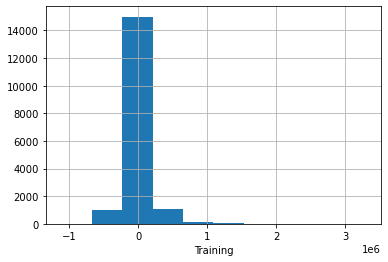

In [40]:
#Plotting the error distribution for training set and test set model2
#Training set
train_e = train_y - model2.predict(train_X)
fig, ax = plt.subplots()
ax = train_e.hist()
ax.set_xlabel('Training')

Text(0.5, 0, 'Validation')

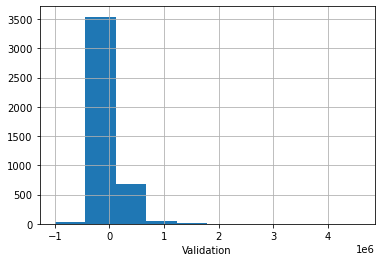

In [41]:
#Test set
valid_e = valid_y - model2.predict(valid_X)
fig, ax = plt.subplots()
ax = valid_e.hist()
ax.set_xlabel('Validation')

There is a similar error distribution (highly distributed around 0) of training and valid sets.

When evaluating the performance of model1 (16 predictors) and model2 (6 predictors), we can see that:
* Root Mean Squared Error (RMSE): model1 = 234628.6661 ~ model2 = 238925.2440
* Coefficient of determination (R^2): model1 = 0.68 ~ model2 = 0.67
* However, we do a good job of eliminating 10 redundant variables. As a result, it avoids waste of space in the source, makes us easier to focus on those that are more important and optimize the speed of model deployment.

### d. KNN regressor model

In this section, we will be using the same predictors 'age', 'grade', 'lat', 'sqft_living', 'view', and 'waterfront' to build the KNN regressor model, because later on we need to compare the performance of the multiple linear regression model and the KNN regressor model.

We are going to test a range of k value and see which produces the lowest error.

In [42]:
#Setting a range for k value (there are 17290 observations in the train set, it is not good to initialize k from a small value)
#Therefore, I choose k_value in the range of (5,51)
k_value = [i for i in range(5,51,2)]

#Creating an empty list that holds cv_scores
error = []

#Creating a loop to test k value
for k in k_value:
    model3 = KNeighborsRegressor(n_neighbors=k).fit(train_X, train_y)
    error.append(mean_squared_error(train_y, model3.predict(train_X)))

In [43]:
#Printing optimal k value (minimum error)
optimal_k = k_value[error.index(min(error))]
print("Our optimal k value is {}".format(optimal_k))

Our optimal k value is 5


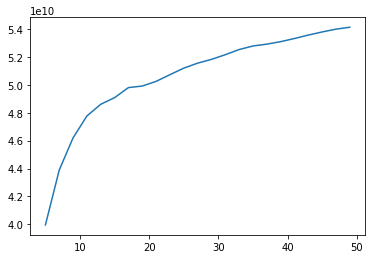

In [44]:
#Plotting k value and error
plt.plot(k_value,error)
plt.show()

To have higher accuracy for our prediction, I choose k = 5 to construct KNN regressor model.

In [45]:
#Constructing model with k = 5
model3 = KNeighborsRegressor(n_neighbors=5).fit(train_X, train_y)

In [46]:
#Printing model performance measurement (on training data) model3
regressionSummary(train_y, model3.predict(train_X))


Regression statistics

                      Mean Error (ME) : 4186.1791
       Root Mean Squared Error (RMSE) : 199902.6763
            Mean Absolute Error (MAE) : 128742.0888
          Mean Percentage Error (MPE) : -9.1339
Mean Absolute Percentage Error (MAPE) : 26.0515


In [47]:
#Using predict() function to make predictions on test set model3
y_pred3 = model3.predict(valid_X)

In [48]:
#Printing model performance measurement (on test data) model3
regressionSummary(valid_y, y_pred3)


Regression statistics

                      Mean Error (ME) : 8314.6203
       Root Mean Squared Error (RMSE) : 278715.9922
            Mean Absolute Error (MAE) : 169470.0272
          Mean Percentage Error (MPE) : -12.1310
Mean Absolute Percentage Error (MAPE) : 33.2792


Training set errors < test data errors, model is not overfitting. The difference in errors between training set and test set is not significant. 

In [49]:
#Printing predictive accuracy measurement model3
print('Coefficient of determination (R^2): %.2f'
      % r2_score(valid_y, y_pred3))

Coefficient of determination (R^2): 0.55


When comparing the prediction performance of multiple linear regression model and KNN regressor model, we have:
* Coefficient of determination: model3 = 0.55 < model2 = 0.67
* Root Mean Squared Error (RMSE): model3 = 278715.9922 > model 2 = 238925.2440

We choose model2, which has better prediction accuracy.

### e. Data standardization and data normalization

In [50]:
#Checking data range of 6 predictors
train_X.describe()

,age,grade,lat,sqft_living,view,waterfront
count,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,51.084905,7.656044,47.559674,2074.586293,0.234182,0.007750
std,29.418996,1.172730,0.138770,903.771540,0.763897,0.087696
min,7.000000,3.000000,47.155900,370.000000,0.000000,0.000000
25%,25.000000,7.000000,47.470225,1420.000000,0.000000,0.000000
50%,47.000000,7.000000,47.571300,1920.000000,0.000000,0.000000
75%,71.000000,8.000000,47.677700,2550.000000,0.000000,0.000000
max,122.000000,13.000000,47.777600,9640.000000,4.000000,1.000000


We can see that our features have very different scales. Therefore, some variables with a larger range of data like 'sqft_living' and 'lat' tend to dominate other variables and skew the outcome.

Solution: we need to rescale the features of the housing dataset.

There are 2 popular types of feature scaling:
* Standardization means to rescale the data to have a mean of 0 and a standard deviation of 1 to fit standard normal distribution.
* Normalization means to rescale the data to a range of (0,1).

#### Which method we are going to use for our machine learning model?

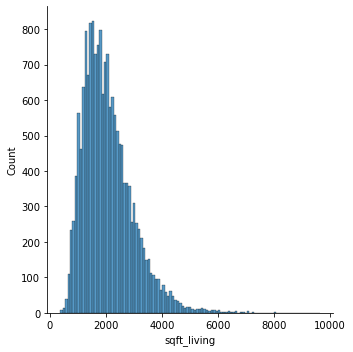

In [51]:
#Plotting sqft_living distribution
dis_sqft_living = sns.displot(train_X, x="sqft_living")

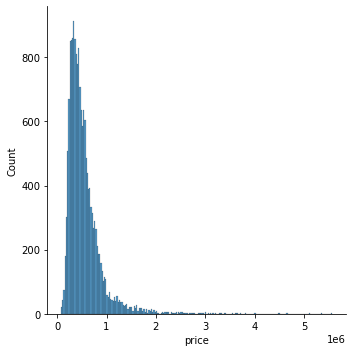

In [52]:
#Plotting price distribution
dis_price = sns.displot(train_y)

The 2 histograms of sqft_living and price indicate that both of them have right-skewed distribution with a long tail filling by outliers. Data normalization just presses the data into a smaller scale of 0-1, and it makes the normalized data more sensitive to outliers. Therefore, it is better to perform data standardization.

#### Performing data standardization

In [53]:
#Conducting data standardization
scaler = StandardScaler()
stan_train_X = pd.DataFrame(scaler.fit_transform(train_X),index=train_X.index,columns=train_X.columns)
stan_valid_X = pd.DataFrame(scaler.fit_transform(valid_X),index=valid_X.index,columns=valid_X.columns)

In [54]:
#Checking the data range of standardized data
stan_train_X.describe()

,age,grade,lat,sqft_living,view,waterfront
count,1.729000e+04,1.729000e+04,1.729000e+04,1.729000e+04,1.729000e+04,1.729000e+04
mean,-1.205578e-17,1.994420e-17,-1.641411e-14,-1.373748e-16,-6.779360e-16,2.204714e-16
std,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00
min,-1.498562e+00,-3.970375e+00,-2.909739e+00,-1.886136e+00,-3.065706e-01,-8.837804e-02
25%,-8.866944e-01,-5.594321e-01,-6.446018e-01,-7.243039e-01,-3.065706e-01,-8.837804e-02
50%,-1.388566e-01,-5.594321e-01,8.378061e-02,-1.710507e-01,-3.065706e-01,-8.837804e-02
75%,6.769664e-01,2.933036e-01,8.505368e-01,5.260483e-01,-3.065706e-01,-8.837804e-02
max,2.410590e+00,4.556982e+00,1.570452e+00,8.371178e+00,4.929889e+00,1.131503e+01


#### Building multiple linear regression model using standardized data

In [55]:
#Building multiple linear regression model using standardized data
model4 = LinearRegression().fit(stan_train_X, train_y)

In [56]:
#Printing model performance measurement (on training data) model4
regressionSummary(train_y, model4.predict(stan_train_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 197649.6106
            Mean Absolute Error (MAE) : 126363.8779
          Mean Percentage Error (MPE) : -4.6707
Mean Absolute Percentage Error (MAPE) : 25.6611


In [57]:
#Using predict() function to make predictions on test set model4
y_pred4 = model4.predict(stan_valid_X)

In [58]:
#Printing model performance measurement (on test data) model4
regressionSummary(valid_y, y_pred4)


Regression statistics

                      Mean Error (ME) : 11036.6129
       Root Mean Squared Error (RMSE) : 240740.4994
            Mean Absolute Error (MAE) : 130421.0389
          Mean Percentage Error (MPE) : -4.1619
Mean Absolute Percentage Error (MAPE) : 25.2131


Training set errors < test data errors, model is not overfitting. The difference in errors between training set and test set is not significant.

In [59]:
#Printing predictive accuracy measurement model4
print('Coefficient of determination (R^2): %.2f'
      % r2_score(valid_y, y_pred4))

Coefficient of determination (R^2): 0.66


Model2 and model4 comparison:
* Coefficient of determination: model4 = 0.66 < model2 = 0.67
* Root Mean Squared Error (RMSE): model4 = 240740.4994 > model2 = 238925.2440

Model2 is still the algorithm with higher prediction accuracy.

#### Building KNN regressor model using standardized data

In [60]:
#Constructing model with k = 5 using standardized data
model5 = KNeighborsRegressor(n_neighbors=5).fit(stan_train_X, train_y)

In [61]:
#Printing model performance measurement (on training data) model5
regressionSummary(train_y, model5.predict(stan_train_X))


Regression statistics

                      Mean Error (ME) : 874.9375
       Root Mean Squared Error (RMSE) : 129516.2352
            Mean Absolute Error (MAE) : 73768.3358
          Mean Percentage Error (MPE) : -3.2650
Mean Absolute Percentage Error (MAPE) : 13.6409


In [62]:
#Using predict() function to make predictions on test set model5
y_pred5 = model5.predict(stan_valid_X)

In [63]:
#Printing model performance measurement (on test data) model5
regressionSummary(valid_y, y_pred5)


Regression statistics

                      Mean Error (ME) : 10123.2304
       Root Mean Squared Error (RMSE) : 194276.9569
            Mean Absolute Error (MAE) : 94907.8615
          Mean Percentage Error (MPE) : -3.8337
Mean Absolute Percentage Error (MAPE) : 16.6141


Training set errors < test data errors, model is not overfitting. The difference in errors between training set and test set is not significant.

In [64]:
#Printing predictive accuracy measurement model5
print('Coefficient of determination (R^2): %.2f'
      % r2_score(valid_y, y_pred5))

Coefficient of determination (R^2): 0.78


Model2 and model5 comparison:

* Coefficient of determination: model5 = 0.78 > model2 0.67
* Root Mean Squared Error (RMSE): model5 = 194276.9569 < model2 = 238925.2440

We pick model5 as our ideal model, which has the highest prediction accuracy.

In [65]:
#Using the KNN regressor model5 to predict the prices of the 10 houses
result5 = pd.DataFrame({'Predicted Values': y_pred5, 'Actual Values': valid_y, 'Residuals': valid_y - y_pred5})
print(result5.head(10))

       Predicted Values  Actual Values  Residuals
15544          556100.0       459000.0   -97100.0
17454          393300.0       445000.0    51700.0
21548          787940.0      1057000.0   269060.0
3427           667767.6       732350.0    64582.4
8809           271000.0       235000.0   -36000.0
3294           664100.0       555000.0  -109100.0
275            370560.0       365000.0    -5560.0
8736           753680.0       685000.0   -68680.0
6161           562230.0       525000.0   -37230.0
19832          447580.0       449950.0     2370.0


## CONCLUSION

Here are some conclusions:
* After carrying out feature selection, there are two continuous features and four discrete features, which are used to predict the price of houses.
* In this project, I have determined the most accurate model by applying KNN regressor model techniques at k = 5 and using standardized data. The coefficient of determination (R^2) is equal to 0.78. Furthermore, we know that the standard R^2 value depends on the study area, and I believe that for house price prediction, a model that has a set of predictors explaining 78% of the outcome is acceptable. 
* I suggest using Nonlinear regression for further analysis because it seems like basic linear regression or KNN regressor can not be applied to create a model with R^2 more than 0.9.

## REFERENCES

* Build Linear Regression Model in Python. [Link](https://github.com/dataprofessor/code/blob/master/python/linear_regression.ipynb)
* Choosing the Correct Type of Regression Analysis. [Link](https://statisticsbyjim.com/regression/choosing-regression-analysis/)
* Feature Selection in Python | Machine Learning Basics | Boston Housing Data. [Link](https://www.youtube.com/watch?v=iJ5c-XoHPFo&list=PLfdYKAN5q9QMO9WkKS67AveqwpcCPFvzc&index=4)
* Feature Selection- With Correlation. [Link](https://github.com/krishnaik06/Complete-Feature-Selection/blob/master/2-Feature%20Selection-%20Correlation.ipynb)
* How High Does R-squared Need to Be? [Link](https://statisticsbyjim.com/regression/how-high-r-squared/)
* Introduction to kNN: k Nearest Neighbors Classification and Regression in Python Using scikit-learn. [Link](https://www.youtube.com/watch?v=SDSC4yLLBKM)
* King County Home Sales: Analysis and the limitations of a multiple regression model. [Link](https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html)
* K-Nearest Neighbor Regression with Python. [Link](https://www.youtube.com/watch?v=bYM09nTVbk0)
* Linear Reg Part 4 RMSE and Model Comparison. [Link](https://www.youtube.com/watch?v=xxFMCm1zPm8)
* Linear regression, test train split, data normalization, yellow brick library etc part 2. [Link](https://www.youtube.com/watch?v=oKiR5E521AQ)
* Machine Learning in Python: Building a Linear Regression Model. [Link](https://www.youtube.com/watch?v=R15LjD8aCzc)
* Normalization Vs. Standardization (Feature Scaling in Machine Learning). [Link](https://youtu.be/bqhQ2LWBheQ)
